In [4]:
%matplotlib inline 
# This allows plots from matplotlib to be displayed under the code
import matplotlib.pyplot as p

In [57]:
from sympy import *
import scipy as sc
import numpy as np
init_printing() 
# Allows display of mathmatical characters without LaTeX formatting


#### Creating symbolic variables for the mathematical variables to work with


In [9]:
x = var('x') # Making a symbolic variable
type(x)

sympy.core.symbol.Symbol

In [14]:
a, b, c = var("a,b,c") # Multiple variables can be assigned at once
a

In [16]:
x = var("x", real=True) # Adding asssumptions (constraints)
x.is_imaginary

False

In [17]:
x = var("x", positive=True) 
x<0

#### Symbolic equations - defining functions

In [45]:
MyFun = (pi+x)**2
MyFun

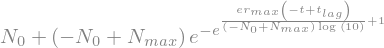

In [42]:
N_0 = var("N_0")
N_max = var("N_max")
r_max = var("r_max")
t_lag = var("t_lag")
t = var("t")

MyFun1 = N_0 + (N_max - N_0) * exp(-exp(r_max * exp(1) * (t_lag - t)/((N_max - N_0) * log(10)) + 1))
MyFun1

In [46]:
# Obtaining the LaTeX syntax of this equation
latex(MyFun)

'\\left(x + \\pi\\right)^{2}'

In [47]:
# The previous version had extra slashes for use in Python 
# For the actual version in LaTeX:
print(latex(MyFun))

\left(x + \pi\right)^{2}


#### Numerical evalution

To evaluate an expression numerically (i.e. simplify the expression until only a single numerical value is left - solving the equation), `evalf`/`N` can be used. It takes an argument `n` which specifies the nubmer of significant digits

In [38]:
pi.evalf(n=100)

In [40]:
N(pi,100) # Same function but shortened

In [51]:
N(MyFun, 5) # Evaluating the function to 5 decimal places

In [52]:
MyFun.evalf(n=5)

In [53]:
MyFun.subs(x, 1.5) # Substituting an element in the function 

In [62]:
MyFun_new = MyFun.subs(x, a+pi)
MyFun_new

In [58]:
x_vec = np.arange(0,10,0.1)
# Evaluating a function over a range of values using Numpy arrays
MyFun_vec = np.array([N(MyFun.subs(x,xx)) for xx in x_vec])
MyFun_vec

array([9.86960440108936, 10.5079229318073, 11.1662414625253,
       11.8445599932432, 12.5428785239612, 13.2611970546792,
       13.9995155853971, 14.7578341161151, 15.5361526468330,
       16.3344711775510, 17.1527897082689, 17.9911082389869,
       18.8494267697049, 19.7277453004228, 20.6260638311408,
       21.5443823618587, 22.4827008925767, 23.4410194232947,
       24.4193379540126, 25.4176564847306, 26.4359750154485,
       27.4742935461665, 28.5326120768845, 29.6109306076024,
       30.7092491383204, 31.8275676690383, 32.9658861997563,
       34.1242047304742, 35.3025232611922, 36.5008417919102,
       37.7191603226281, 38.9574788533461, 40.2157973840640,
       41.4941159147820, 42.7924344455000, 44.1107529762179,
       45.4490715069359, 46.8073900376538, 48.1857085683718,
       49.5840270990898, 51.0023456298077, 52.4406641605257,
       53.8989826912436, 55.3773012219616, 56.8756197526795,
       58.3939382833975, 59.9322568141155, 61.4905753448334,
       63.0688938755514,

In [64]:
MyFun_new_vec = np.array([N((MyFun_new).subs(a,xx)) for xx in x_vec])
MyFun_new_vec

array([39.4784176043574, 40.7450546657934, 42.0316917272293,
       43.3383287886652, 44.6649658501011, 46.0116029115370,
       47.3782399729729, 48.7648770344089, 50.1715140958448,
       51.5981511572807, 53.0447882187166, 54.5114252801525,
       55.9980623415884, 57.5046994030244, 59.0313364644603,
       60.5779735258962, 62.1446105873321, 63.7312476487680,
       65.3378847102040, 66.9645217716399, 68.6111588330758,
       70.2777958945117, 71.9644329559476, 73.6710700173835,
       75.3977070788195, 77.1443441402554, 78.9109812016913,
       80.6976182631272, 82.5042553245631, 84.3308923859990,
       86.1775294474349, 88.0441665088709, 89.9308035703068,
       91.8374406317427, 93.7640776931786, 95.7107147546145,
       97.6773518160505, 99.6639888774864, 101.670625938922,
       103.697263000358, 105.743900061794, 107.810537123230,
       109.897174184666, 112.003811246102, 114.130448307538,
       116.277085368974, 118.443722430410, 120.630359491846,
       122.836996553281,

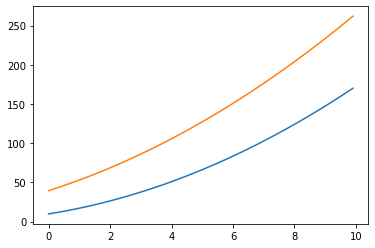

In [67]:
fig, ax = p.subplots()
ax.plot(x_vec, MyFun_vec)
ax.plot(x_vec, MyFun_new_vec)

#### Vectorization for evaluation 

`lambdify()` compiles a Sympy expression into a function that is more efficient to evlalute. The first argument is a python list of variables that the function will operate on. 

In [71]:
MyFun_lamb = lambdify([x], MyFun, 'numpy')
MyFun_vec = MyFun_lamb(x_vec)
MyFun_vec

array([  9.8696044 ,  10.50792293,  11.16624146,  11.84455999,
        12.54287852,  13.26119705,  13.99951559,  14.75783412,
        15.53615265,  16.33447118,  17.15278971,  17.99110824,
        18.84942677,  19.7277453 ,  20.62606383,  21.54438236,
        22.48270089,  23.44101942,  24.41933795,  25.41765648,
        26.43597502,  27.47429355,  28.53261208,  29.61093061,
        30.70924914,  31.82756767,  32.9658862 ,  34.12420473,
        35.30252326,  36.50084179,  37.71916032,  38.95747885,
        40.21579738,  41.49411591,  42.79243445,  44.11075298,
        45.44907151,  46.80739004,  48.18570857,  49.5840271 ,
        51.00234563,  52.44066416,  53.89898269,  55.37730122,
        56.87561975,  58.39393828,  59.93225681,  61.49057534,
        63.06889388,  64.66721241,  66.28553094,  67.92384947,
        69.582168  ,  71.26048653,  72.95880506,  74.67712359,
        76.41544212,  78.17376065,  79.95207918,  81.75039771,
        83.56871624,  85.40703477,  87.26535331,  89.14

In [73]:
%%timeit 
MyFun_vec = np.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])
MyFun_vec

14.7 ms ± 213 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [75]:
%%timeit 
MyFun_vec = MyFun_lamb(x_vec) # Significantly faster!

2.17 µs ± 215 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
